In [71]:
import requests

def save_server_data(url, filename):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'a') as file:  # Open file in append mode
                file.write(response.text + '\n')  # Write data to a new line
                print("Data saved successfully:")
                print(response.text)  # Print the received data
        else:
            print(f"Failed to retrieve data from server. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Define the URL and filename
url = "http://192.168.43.199/"
filename = "test_data.txt"

# Continuous loop to retrieve and save data
while True:
    save_server_data(url, filename)


Data saved successfully:
Time: 20453 IR: 850.00 Red: 774.00
Data saved successfully:
Time: 20593 IR: 1093.00 Red: 1006.00
Data saved successfully:
Time: 20753 IR: 2939.00 Red: 2668.00
Data saved successfully:
Time: 20894 IR: 28623.00 Red: 26816.00
Data saved successfully:
Time: 21034 IR: 71161.00 Red: 55630.00
Data saved successfully:
Time: 21134 IR: 58819.00 Red: 48560.00
Data saved successfully:
Time: 21294 IR: 76075.00 Red: 56246.00
Data saved successfully:
Time: 21395 IR: 83903.00 Red: 60364.00
Data saved successfully:
Time: 21534 IR: 98316.00 Red: 64607.00
Data saved successfully:
Time: 21635 IR: 99463.00 Red: 65073.00
Data saved successfully:
Time: 21735 IR: 100580.00 Red: 65398.00
Data saved successfully:
Time: 21876 IR: 100689.00 Red: 64845.00
Data saved successfully:
Time: 22016 IR: 101479.00 Red: 65118.00
Data saved successfully:
Time: 22176 IR: 102000.00 Red: 65310.00
Data saved successfully:
Time: 22316 IR: 101777.00 Red: 65337.00
Data saved successfully:
Time: 22456 IR: 10

75 79  81  83 

In [65]:
import pandas as pd

# Function to process the file
def process_file(input_file, output_file):
    data = []
    with open(input_file, 'r') as file:
        for line in file:
            if line.startswith("Time"):
                parts = line.split()
                time = int(parts[1])
                ir = float(parts[3])
                red = float(parts[5])
                data.append([time, ir, red])

    # Convert the data into a pandas DataFrame
    df = pd.DataFrame(data, columns=["Time", "IR", "Red"])

    # Save the DataFrame to a new text file
    df.to_csv(output_file, index=False, sep='\t')

    return df

# Specify the input and output file names
input_file = "monika_data.txt"
output_file = "structured_monika.txt"

# Process the file
df = process_file(input_file, output_file)

# Display the resulting DataFrame
print(df.head())


    Time        IR      Red
0  17688  110178.0  83836.0
1  17768  109627.0  83709.0
2  17868  109776.0  83805.0
3  17968  109958.0  83763.0
4  18068  110253.0  83861.0


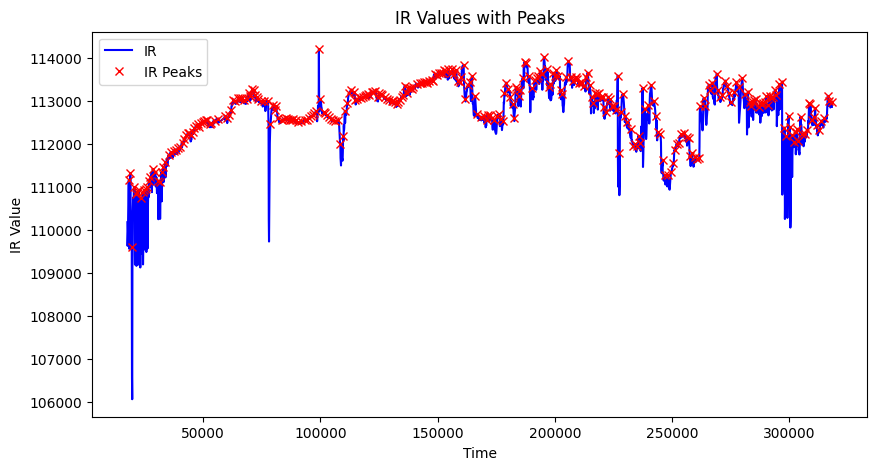

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

filtered_data_file ="structured_monika.txt"
data = pd.read_csv(filtered_data_file, delimiter='\t')

sampling_rate = 0.015
min_interval_ms = 400
samples_between_peaks = int(min_interval_ms * sampling_rate)

ir_peaks, _ = find_peaks(data['IR'], distance=samples_between_peaks)
ir_peak_values = data['IR'][ir_peaks].tolist()
ir_peak_times = data['Time'][ir_peaks].tolist()


red_peaks, _ = find_peaks(data['Red'], distance=samples_between_peaks)
red_peak_values = data['Red'][red_peaks].tolist()
red_peak_times = data['Time'][red_peaks].tolist()


ir_rr_intervals = [ir_peak_times[i+1] - ir_peak_times[i] for i in range(len(ir_peak_times)-1)]
red_rr_intervals = [red_peak_times[i+1] - red_peak_times[i] for i in range(len(red_peak_times)-1)]
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['IR'], color='blue', label='IR')
plt.plot(ir_peak_times, ir_peak_values, 'x', color='red', label='IR Peaks')
plt.xlabel('Time')
plt.ylabel('IR Value')
plt.title('IR Values with Peaks')
plt.legend()
plt.show()



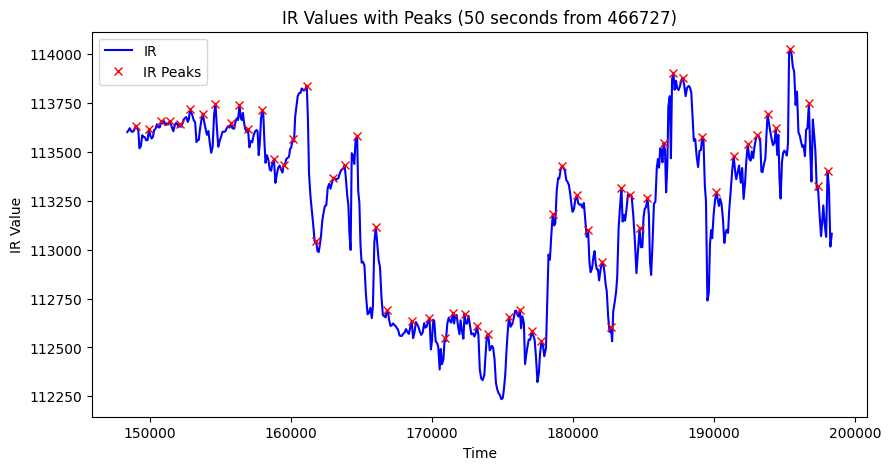

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the structured data
filtered_data_file = "structured_monika.txt"
data = pd.read_csv(filtered_data_file, delimiter='\t')

# Define the start time and interval
start_time = 148355
interval_seconds = 50

# Filter the data for the specified interval
end_time = start_time + interval_seconds * 1000  # Convert seconds to milliseconds
filtered_data = data[(data['Time'] >= start_time) & (data['Time'] <= end_time)]

# Set the sampling rate and minimum interval for peak detection
sampling_rate = 0.015  # Assume 0.014 samples/ms
min_interval_ms = 400
samples_between_peaks = int(min_interval_ms * sampling_rate)

# Find IR peaks
ir_peaks, _ = find_peaks(filtered_data['IR'], distance=samples_between_peaks)
ir_peak_values = filtered_data['IR'].iloc[ir_peaks].tolist()
ir_peak_times = filtered_data['Time'].iloc[ir_peaks].tolist()

# Find Red peaks
red_peaks, _ = find_peaks(filtered_data['Red'], distance=samples_between_peaks)
red_peak_values = filtered_data['Red'].iloc[red_peaks].tolist()
red_peak_times = filtered_data['Time'].iloc[red_peaks].tolist()

# Plot the IR data with peaks
plt.figure(figsize=(10, 5))
plt.plot(filtered_data['Time'], filtered_data['IR'], color='blue', label='IR')
plt.plot(ir_peak_times, ir_peak_values, 'x', color='red', label='IR Peaks')
plt.xlabel('Time')
plt.ylabel('IR Value')
plt.title('IR Values with Peaks (50 seconds from 466727)')
plt.legend()
plt.show()


In [69]:
len(ir_rr_intervals)/5

68.0

In [70]:
import numpy as np
rr_intervals_ms = np.array(ir_rr_intervals)

rmssd = np.sqrt(np.mean(np.diff(rr_intervals_ms) ** 2))

print("RMSSD (ms):", rmssd)
ln_rmssd = np.log(rmssd)

print("ln(RMSSD):", ln_rmssd)


RMSSD (ms): 395.1117126670958
ln(RMSSD): 5.9791685417946905
